some equations:  
$
D = (n1, n2, n3);\ P(n) = \frac{\lambda^n}{n!}e^{-\lambda};\ P(\lambda) \sim \frac{1}{\Gamma(k)\theta^k} \lambda^{k-1}e^{\frac{\lambda}{\theta}}\\
P(\lambda) = \frac{P(D|\lambda)P(\lambda))}{\int_{\Omega}P(D|\lambda)P(\lambda)d\lambda} = 
\frac{\frac{\lambda^{n_1+n_2+n_3}}{n_1!n_2!n_3!}e^{-3\lambda}P(\lambda)}{\int_{-\infty}^{+\infty}\frac{\lambda^{n_1+n_2+n_3}}{n_1!n_2!n_3!}e^{-3\lambda}P(\lambda)d\lambda}
$

In [1]:
import math
import numpy as np
import functools
from matplotlib import pyplot as plt

In [2]:
def integrate(function, step, interval):
    return sum(function(item) * step for item in np.arange(interval[0], interval[1], step))


def multiply_factorials(data):
    result = 1
    for item in data:
        result *= math.factorial(item)
    return result


def aposteriori_by_apriori(d, apriori_function):
    factorials = multiply_factorials(d)
    def integrand(lambda_):
        return (lambda_ ** sum(d)) / factorials * math.exp(-3 * lambda_) * apriori_function(lambda_)
    
    down_frac = integrate(integrand, 0.001, (0, 100))
        
    def aposteriori(lambda_):
        return (lambda_ ** sum(d) / factorials) * math.exp(-3 * lambda_) * apriori_function(lambda_) / down_frac
    return aposteriori


def gamma_distribution(k, theta):
    constant = 1 / (math.gamma(k) * (theta ** k))
    def fixed(lambda_):
        return constant * (lambda_ ** (k - 1)) * math.exp(-1 * lambda_ / theta)
    return fixed


def E_estimation(distribution_function):
    def fixed_with_x(x):
        return distribution_function(x) * x
    return integrate(fixed_with_x, 0.001, (0, 100))


def MAP_estimation(distribution_function):
    return max(
        ((distribution_function(item), item) for item in np.arange(0, 100, 0.001)), key=lambda x: x[0]
    )[1]

In [3]:
d = [5, 12, 15]
k = 3
theta = 3

In [4]:
apriori = gamma_distribution(k, theta)
aposteriori = aposteriori_by_apriori(d, apriori)

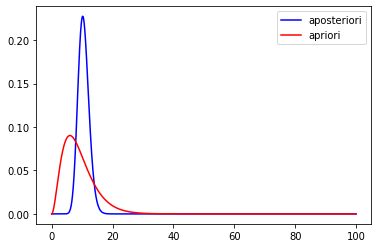

In [5]:
x = [i / 1000 for i in range(100000)]
y_apriori = list(map(apriori, x))
y_aposteriori = list(map(aposteriori, x))
plt.plot(x, y_aposteriori, color='blue', label='aposteriori')
plt.plot(x, y_apriori, color='red', label='apriori')
plt.legend()

In [6]:
E_estimation(aposteriori)

10.500000000000073

In [7]:
MAP_estimation(aposteriori)

10.200000000000001

In [9]:
np.random.poisson(20, size=3)

array([19, 21, 21])

In [14]:
from IPython.display import HTML, display_html
import matplotlib.animation as animation

In [33]:
data = list()
apriori = gamma_distribution(k, theta)
x = [i / 1000 for i in range(100000)]
for i in range(10):
    sample = np.random.poisson(20, size=3)
    aposteriori = aposteriori_by_apriori(sample, apriori)
    data.append({'x': x, 'y': list(map(aposteriori, x))})
    apriori = aposteriori

In [34]:
apriori = gamma_distribution(k, theta)

In [37]:
%%capture
def update_line(num, data, line):
    line.set_data(data[num]['x'], data[num]['y'])
    return line,


fig1 = plt.figure(figsize=(10, 10))
plt.plot(x, list(map(apriori, x)), color='blue', label='apriori')
plt.vlines(20, ymin=0, ymax=1, label='actual lambda')
l, = plt.plot([], [], 'r-')
plt.legend()
line_ani = animation.FuncAnimation(
    fig1, update_line, range(10), fargs=(data, l), interval=200, blit=True
)

In [38]:
display_html(HTML(line_ani.to_html5_video()))

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAmBm1kYXQAAAKtBgX//6ncRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49NSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNo
PTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFw
bWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAEuBliIQA
E//+97GPgU3IAA2XOop6H+EVsfSQUXqx2aBk6gAAAwAAAwAAAwAQjocotiX1cXGWgAAACmgBjANu
DKtj0+lLHxAEPn9djB19jvn+FFSwwDbQoaepje6GL+b3tNaQInGtcM5LfiqHmCX/eWgev1Fcoiza
wFg9OHXzpuDL2Q5XeQbW9nkxDSEIQRRyVzIJN64JEI/L10f/qjVIznnT+RXZvTcoys7MeT7Bdgte
dkHKPcuusoVDY3QLRtrJFuSR/QJM19zMOCEiUyNEmKu6DTLx6CmH0NftudtlLhbD7DXY2MatQRF4
QXgBKUFHdH8QCKmNFxq7CR/gp0cUNjS+RXzAKSVfYGSf9ZAAABkPGUNtUqVT5Ctstt7c8bH9jREY
bhso0RPpp9Rtd+FGsm8z9sdvUIUy3d4hHUjJC5ZIcTKsG2WO0CnIl0xkqe4KI2Etb/MoXHxbPZgZ
k4JIWuYz8m4sLEiTAZs4Bmn1DnffM1dtCrip0En9UvcuA/j71Y0rJVXnLBgJiiTvQLlgxrxzRGY/
puSYrwBU5qrZfQwB4tNzPhwJveJPbM1bUEfNR7s1t+skSbpQGgs6QmHb1ktJ3cN9W970yy5iouJN
IrnE06PNegMHlIq1v4SIi5aRi95lp++9XuCMYD/s7dmSFI7skNBKmcD54Wh1K31IyXmkBQL0m2I3
8ZEHsWYa/tnTKbFA/fzvINd+LrYCxTcIQGy2QCAP2TTo0nDmQ3y/+VFvOQ2Lk7pqVPTWxY23/I+a
N4+yOU/FraNHcy8kDwZilekdi+ZCz/CF1BuGtoOZ4d1GKXvmAezDkYmZ16uCi8ENhwJHyBMnSzqH
seT1OFmWxf01x1qeyZevWR5fKOT2RZLpdE0fhiEX3oeH7AK9mKo5T2jIhWeXoKJJwBr0iQ+oaU//
PE2M/a1n0hN4S0SqlqTykDtiDrEFdjmPMgFLMNfCEBbWN7Z0rFh9ebFUp8UDzjQ54da5YwSsups2
/eZPnw3ivNSHsoL/TKyP6rms4E2hHJYLrTsm2Vl0AK+IqNmE4WPvVGe53VSugTn4pAtSgiiAgBMR
ZaVkRGNAZvTGHo5NlE5htyTC7AIV3awmYsiVcFdQIx/HZgSxUZaUEJ71HbZkwb8YNmxlxrp+R+ut
m1mFDzVpzLEVcxKg5QQUHG+L3s/ReWM4nIlvhFXXA4UVHrLOsrQhd/syIc5dRZRjIyvAwOWzHgUG
x0nc/GvQSvVD9opD2Z114qvCcS8s2wSGmc1BC3rOWV76AVUpEiPoi9aQMD5k+cMX1Qf0Prob9Lz7
yZKyPAcvh23kG1uS8NT8yNz6NoUY4UuPX3avImoHUKdGZlO+Gc04VdIpH5D1OPTWHF3UYFFTSRZj
dxo7u+Bd0GWDaxh5bQfVp+9a3KNDVwex3R108S3o9QvpIykacty0KxzrP462yn/XOuP+vMg95WJD
cyKl6dfEKY5TOHuY4jZsmuYVqa+44Z5vDiNqic/aEGJcwev0Jb/3wbIlv7+qPi5AbIw2S0RlVrgT
0sGg/MjAvC2csL990bO5n0zLI/5lISp/84Wi9TVudYO/wf88U8uuf8GqZZ2yJrHwhJLyf1xyZi9U
FW2HzWn+h934PmMWzCRyjdYvXIQZIMSClb6lZndUYaZ+Nv+KRg/uL9lMic7sUEcWmhYKK2kZImcS
1z5o9//XGeOt+oIOpFWzrnwpBUr2ToCLFGrpQfSY7HCy5mA2uj/7tlxXXeITL9deCNK0ojKHgx/+
q1KAeLeWIM4XCEklJD3z/DgSJEjTaiebugZW8scxyZC0Df/0LHWGc6ql/Ck7PF0Hgtyu4kv2evMQ
ZClZBFDL6EEg9wFEKxRvFo4jz1e8IoUlOLhOTCuELzw8tWa3NIrZOuBWZQlUND0raKxlu0YgaKDj
XbCBoFlsCBPdnHMl0nSj7rTxWwkt2nRf8ZXj0184S1NdSvp7DIuNYqiVqTwW1Ofi6qeeW8ybzDdo
SH/AE0DmKTtDPYCFcL2JdkQeQJRNAqCE+ZO1KiIU4M9YIxQbi5U6TNHb9yJ/8A+BHrXqduHGAeA3
KMjAGtnVF4hLW72mzQTqmN8dVV4zWXoRC0PfPM1YdykMWCBbnkSX5WJIxgOjTkqVjsKnua/3BQ0F
m1Psv+Hl6AK2H5pKjyjfI0wRVNij3Cr0FdY/wzlhSBPvqEY5IjBEJKiWz0HRPuswb/qr8/R2ezyE
41B5zWF3lcfGW40/9rK1mRqx7qf6Wx3MPiUXBsx5+Y/HU8f2ngqdYddnwS+sWmOoiM1zfN/Igbdf
stXyCC5zbfFmHPFY/1d1xwyguvO1uWH/PdhksGbEnnQDnO/OIi2zb6kshA4Oya35lB3BlV1NrGZu
cBaHuOC9D5X2gwr2Wzy3LznabfyAGL/x9mhd9ajLwD3pwLgKJJbsehFbnsD/LQHQi3b/lglvD90S
JWx3Lm5Q7fJnZyFj1Dfu4nDQgvg8PdydOSBj/qwezD50pr+exWCdUSR2/34GPA/78V5pXXhRKFeU
FMbSs3Kl/qa6gOrrIADAMDTj+ccLjdImYdV0tzoGiXiGBbVgVoyePNLwtXaIZlbWT8OTN2eao9Ez
o48IfoEQcvEj7puFcYai7iXjKOpFVe/F+N6ioaUow7SltrbfszmEY11IcVcLBLAxGv/fV3PLOi2q
sELiq02b/hriAt5ajuBWURNI0hwW17v08te+84G/v93NN+JHJ0il5w5jBCRtdBAkzJsm2DwetvG6
19zfIgM1g5ktDBoCq5Uj05v8x0pO7ZbxWi76KPpha3BeLz0BaBZVuQvtgC4eOib57dcLSET8U/Ku
HaBVDsgJcy2lE8fKjA+2Y6NiPGvnHaQLHrhraXQOnM3IJ5AfUadNFInWiQcDGA+zG25i+27zzTs7
+i+wAAAKkT2NcIg2E/pmX